# Q2

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [ ]:
# %cd drive/MyDrive/pics/

In [ ]:
pwd

'/content/drive/My Drive/pics'

# Segmentation

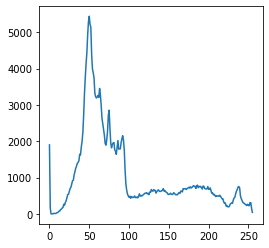

In [2]:
img = cv2.imread("hinton.jpg" , cv2.IMREAD_GRAYSCALE)
# get histogram
hist = cv2.calcHist([img] , [0] , None , [256] , [0,256])
fig = plt.figure(figsize=(4,4))
plt.plot(hist)

In [3]:
def global_thresholding(image , k):

    ## your Code here ##
  ret, thresh = cv2.threshold(image, k , 255, cv2.THRESH_BINARY)
  return thresh

In [4]:
def otsu_thresholding(image):

    ## your Code here ##
  ret, threshold = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return threshold

In [5]:
def adaptive_thresholding(image , C , blocksize):

    ## your Code here ##
  threshold = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,blocksize,C)
  return threshold

<Figure size 432x288 with 0 Axes>

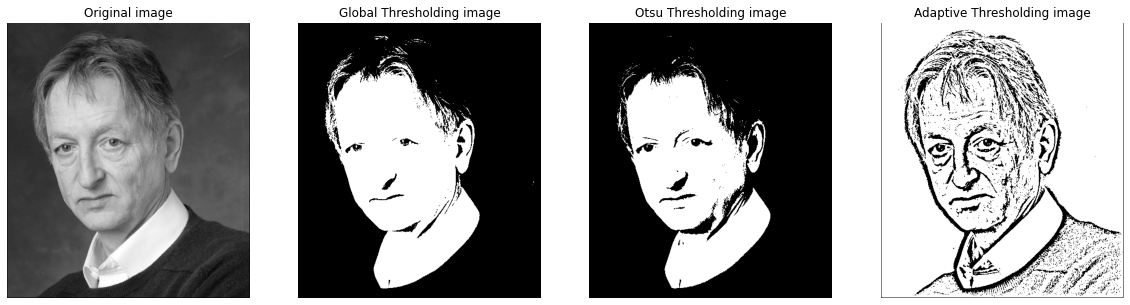

In [6]:
# run this cell #
# try a few k's from histogram of image to find best k 
k = 100
image_global = global_thresholding(img , k)
image_otsu = otsu_thresholding(img)
image_adaptive = adaptive_thresholding(img , C = 7 , blocksize = 31)

# show results here
plt.gray()
fig = plt.figure(figsize=(20,20))
cols = 4
rows = 1

fig.add_subplot(rows , cols , 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original image")

fig.add_subplot(rows , cols , 2)
plt.imshow(image_global)
plt.axis('off')
plt.title("Global Thresholding image")

fig.add_subplot(rows , cols , 3)
plt.imshow(image_otsu)
plt.axis('off')
plt.title("Otsu Thresholding image")

fig.add_subplot(rows , cols , 4)
plt.imshow(image_adaptive)
plt.axis('off')
plt.title("Adaptive Thresholding image")

plt.show()

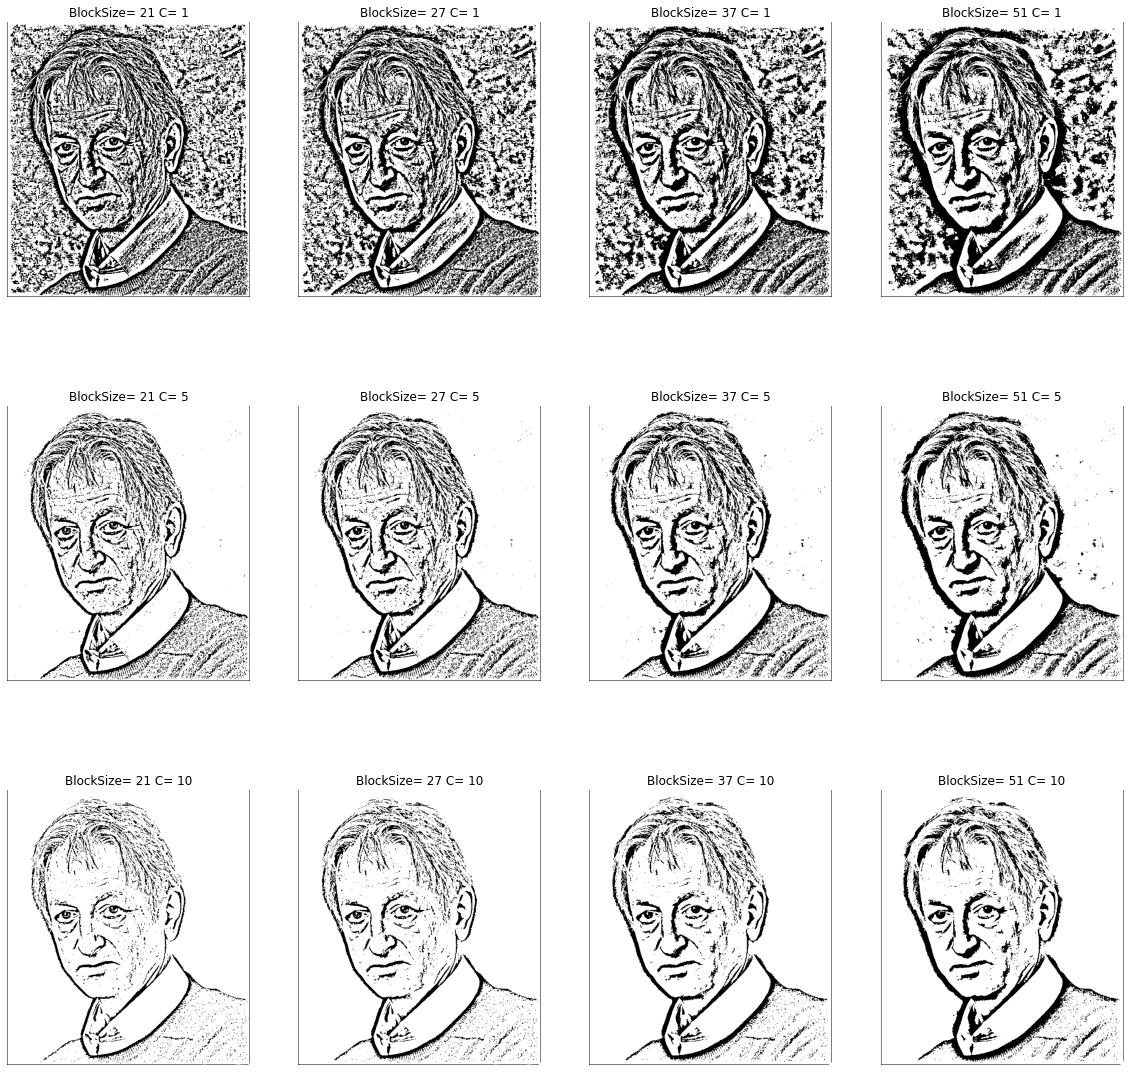

<Figure size 432x288 with 0 Axes>

In [13]:
# Adaptive Thresholding image for different amount of blocksize and C
cs = [1, 5, 10]
blocks = [21, 27, 37, 51]
counter = 1
fig = plt.figure(figsize=(20, 20))
for c in cs:
  for block in blocks:
    image_adaptive = adaptive_thresholding(img, C = c, blocksize = block)
    fig.add_subplot(len(cs), len(blocks), counter)
    plt.imshow(image_adaptive)
    plt.axis('off')
    plt.title("BlockSize= "+str(block) + " C= "+str(c))
    counter += 1
plt.show()

# Tumor Extraction

Text(0.5, 1.0, 'Adaptive')

<Figure size 432x288 with 0 Axes>

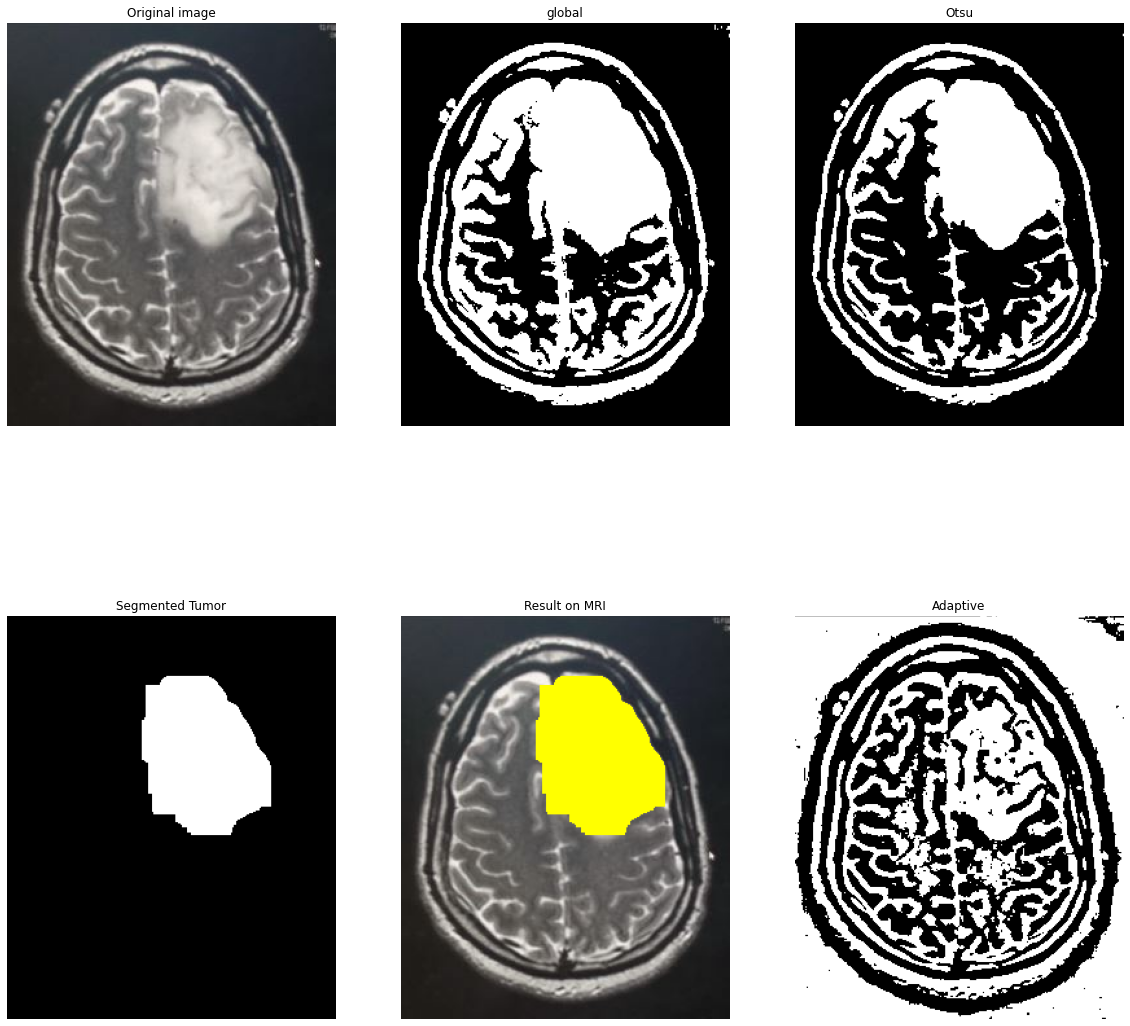

In [19]:
## Your code here ##
#Start#
image = cv2.imread("brain.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_global = global_thresholding(gray_image, k)
image_otsu = otsu_thresholding(gray_image)
image_adaptive = adaptive_thresholding(gray_image, C = 3 , blocksize = 31)
out = image.copy()

# opening
kernel = np.ones((31, 31),np.uint8)
T = cv2.morphologyEx(image_global, cv2.MORPH_OPEN, kernel)
# find_contours just for coloring

out[T == 255] = (255, 255, 0)

#End#


# show Per Step result if needed #
plt.gray()
fig = plt.figure(figsize=(20,20))
cols = 3
rows = 2

fig.add_subplot(rows , cols , 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original image")

fig.add_subplot(rows , cols , 2)
plt.imshow(image_global)
plt.axis('off')
plt.title("global")

fig.add_subplot(rows , cols , 3)
plt.imshow(image_otsu)
plt.axis('off')
plt.title("Otsu")

fig.add_subplot(rows , cols , 4)
plt.imshow(T)
plt.axis('off')
plt.title("Segmented Tumor")

fig.add_subplot(rows , cols , 5)
plt.imshow(out)
plt.axis('off')
plt.title("Result on MRI")

fig.add_subplot(rows , cols , 6)
plt.imshow(image_adaptive)
plt.axis('off')
plt.title("Adaptive")